#### Raquel Peña.
#### Student number: 23083963

In [ ]:
import numpy as np
import scipy as sp
from scipy import io
import cv2 as cv 
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (12.0, 10.0)

# Part A: Factored Sampling
This part is mostly illustrative, so you just have a few TODO's. Condensation is actually Factored Sampling, but applied iteratively to a sequence of observations, and incorporating a motion model.\
So here, time will essentially stand still: given a SINGLE set of "observations", can you estimate the posterior probabilities?\
Observations will be simulated: The real 2D distribution we would like to estimate is the red channel of an abstract image (provided).
But pretend you can't look at the whole image, and can only take measurements here and there.

Below, you have the code for factored sampling, but note the comment "Loop from here".
Looping will only be needed in PartB because we will have a changing state, so each loop will advance from $t$ to $t + 1$.
Here, you can abuse factored sampling a little, and loop "in place".
If time were advancing and you had a real motion model, that would be Condensation.\
*Observe: when you do this factored Resampling, more of the particles  should be landing near the peaks in the distribution.*

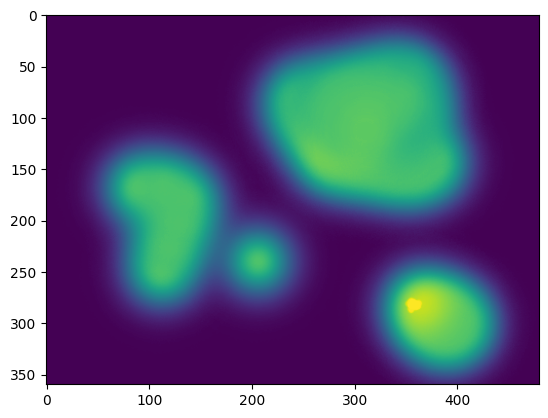

In [6]:
img = cv.imread('data/abstract.png')
measurementsComprehensive = img[:,:,2]
plt.imshow(measurementsComprehensive)
plt.show()


In [7]:
imgHeight, imgWidth, colors = img.shape
numParticles = 150;
# Initialize which samples from "last time" we want to propagate: all of
# them!:
samples_to_propagate = range(0, numParticles)
numDims_w = 2

Iteration  0 :


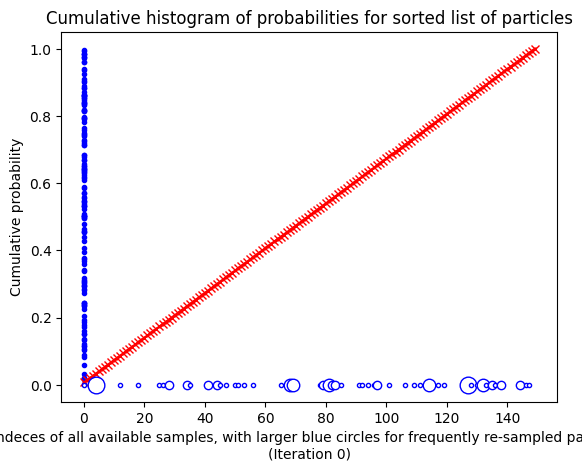

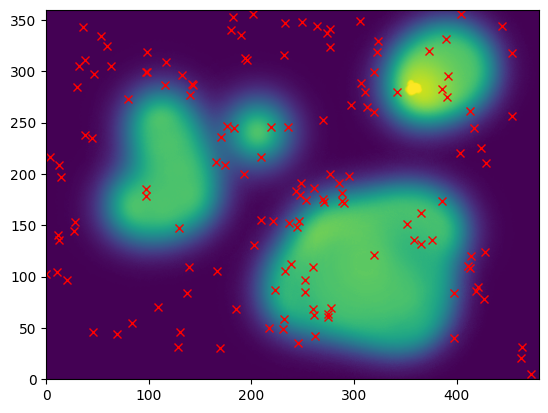

C:\Users\rache\AppData\Local\Temp\ipykernel_27948\3722342717.py:94: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  interpolation_func = sp.interpolate.interp2d(np.arange(0, imgWidth),
C:\Users\rache\AppData\Local\Temp\ipykernel_27948\3722342717.py:97: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisp

Iteration  1 :


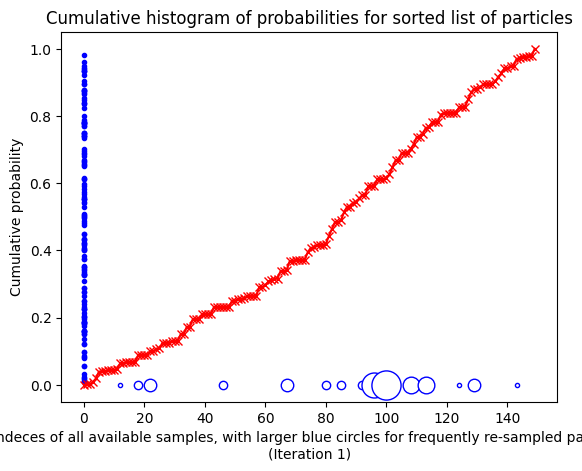

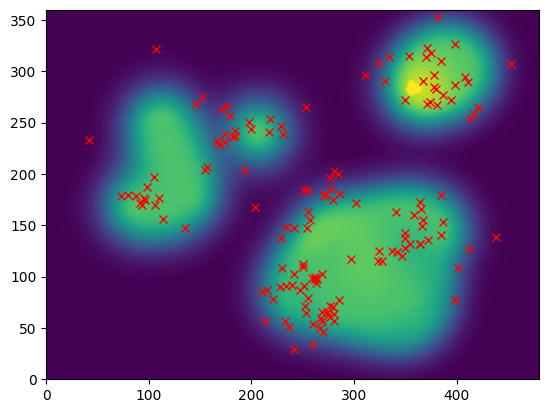

Iteration  2 :


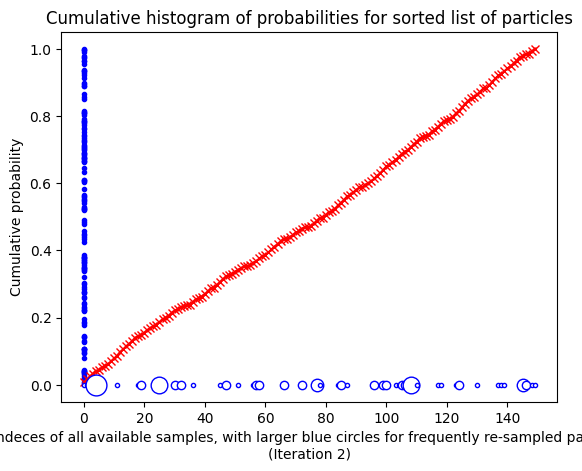

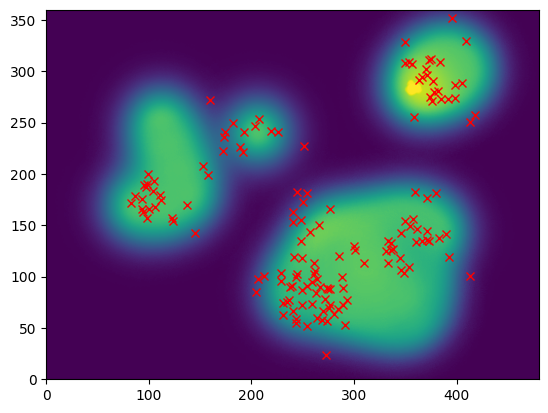

Iteration  3 :


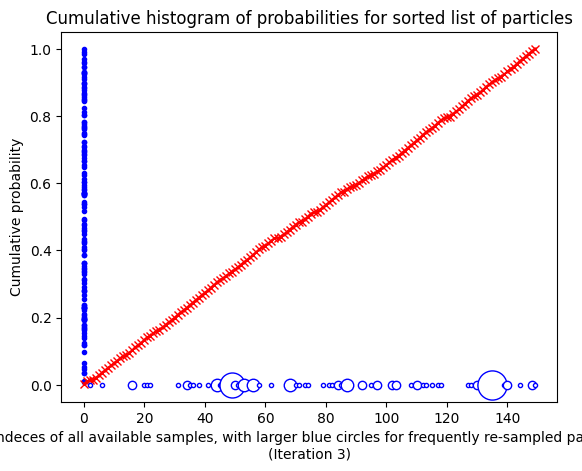

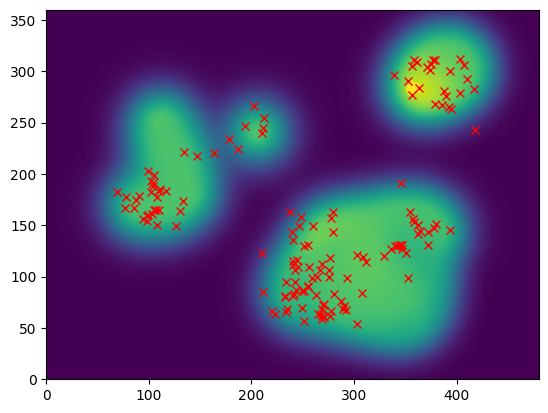

Iteration  4 :


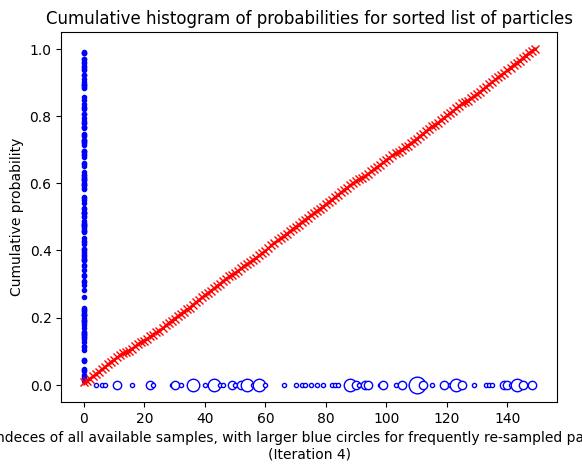

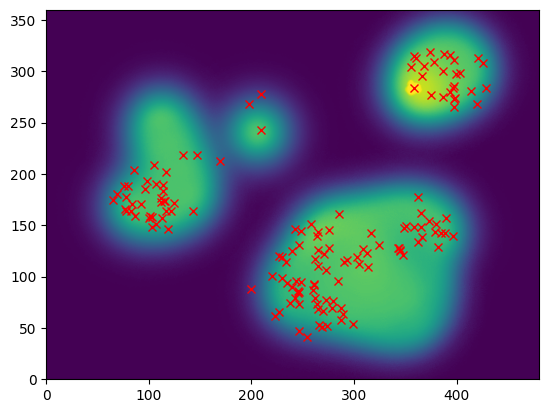

Iteration  5 :


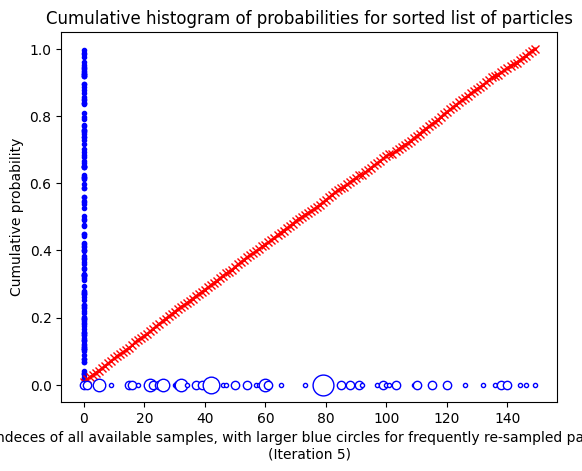

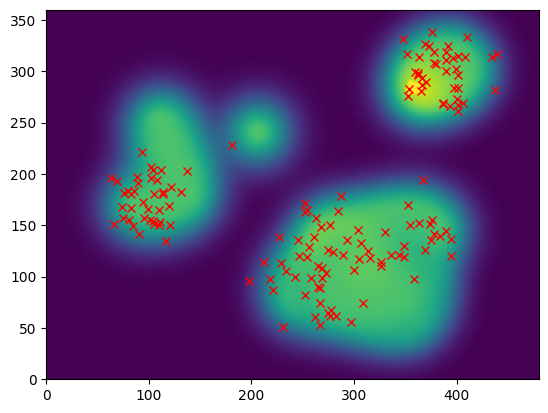

Iteration  6 :


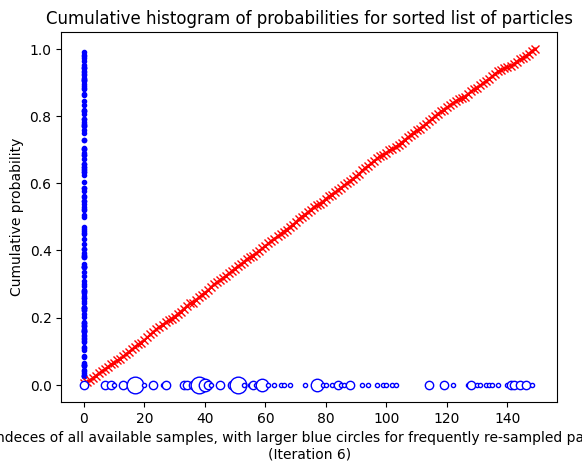

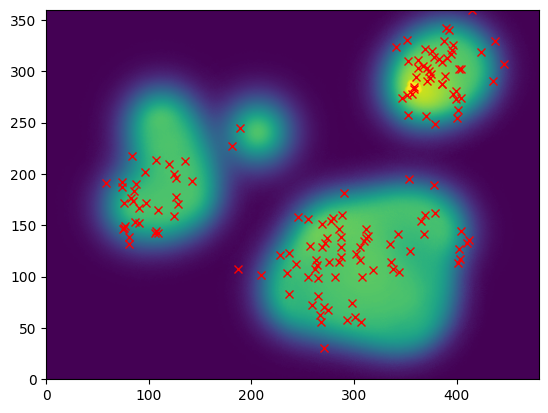

Iteration  7 :


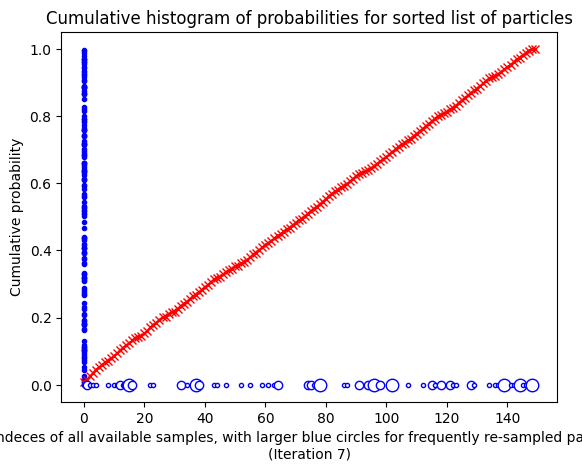

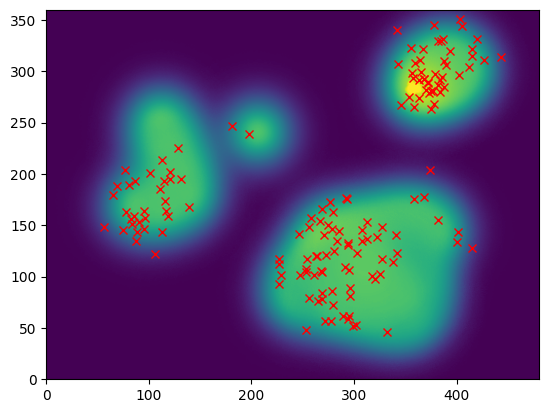

Iteration  8 :


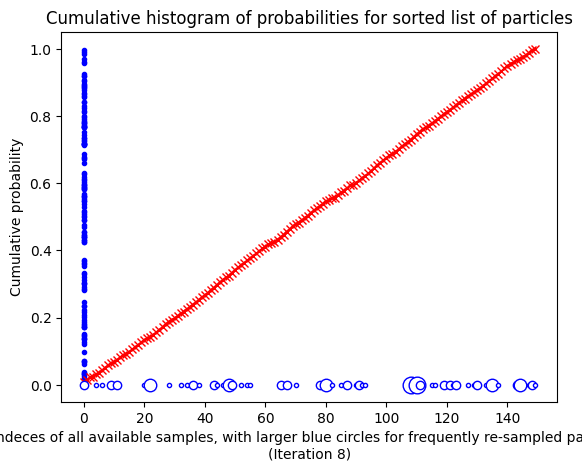

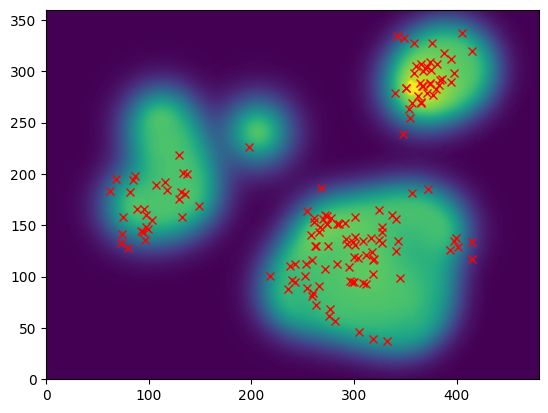

Iteration  9 :


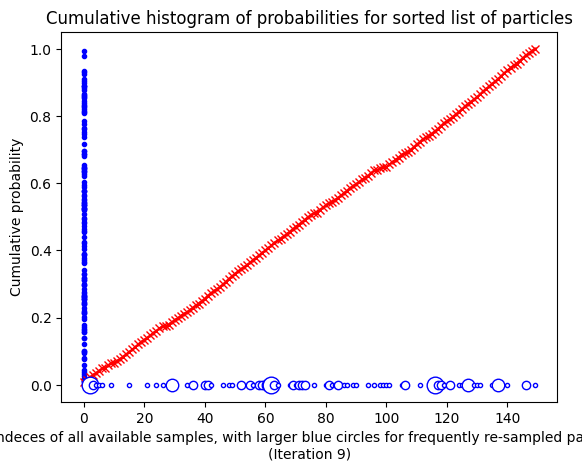

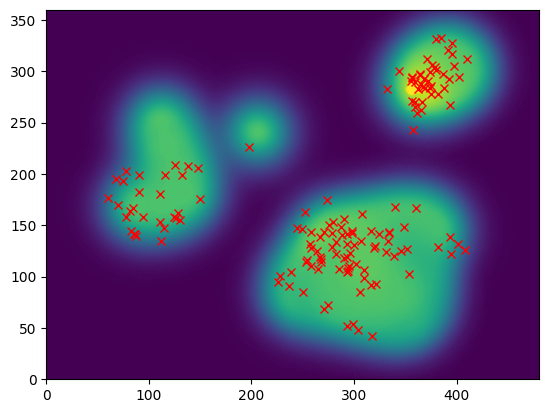

In [8]:
# Here we randomly initialize some particles throughout the space of w.
# The positions of such particles are quite close to the known initial position:
particles_old = np.random.rand(numParticles, numDims_w)

#note: clipping here is just done to simplify plotting - we want everything to 'fit'
particles_old[:,0] = particles_old[:,0] * imgHeight
particles_old[:,1] = particles_old[:,1] * imgWidth

weight_of_samples = np.ones((numParticles,1))
# TO DO (a): normalize the weights (may be trivial this time)
#weight_of_samples = weight_of_samples #replace this 
weight_of_samples = weight_of_samples / np.sum(weight_of_samples)

# We loop here to see what factored resampling would look like.
for iTime in range(10):
    print('Iteration ', iTime, ':')
    # TO DO (b): compute the cumulative sum of the weights
    # cum_hist_of_weights = np.linspace(0, 1, numParticles) # replace this 
    cum_hist_of_weights = np.cumsum(weight_of_samples)

    # Resample the old distribution (at time t-1), favoring samples that had
    # a higher posterior probability
    samples_to_propagate = np.zeros((numParticles,1), dtype=np.int32)
    
    # Pick random thresholds in the cumulative probability's range [0,1]: 
    some_threshes = np.random.rand(numParticles,1)

    # For each random threshold, find which sample in the ordered set is the
    # first one to push the cumulative probability above that threshold. 
    # E.g. if the cumulative histogram goes from 0.23 to 0.26 between the 17th
    # and 18th samples in the old distribution, and the threshold is 0.234,
    # then we'll want to propagate the 18th sample's w (i.e. particle #18).
    for sampNum in range(numParticles): 
        thresh = some_threshes[sampNum]
        for index in range(numParticles):
            if cum_hist_of_weights[index] > thresh:
                break
        samples_to_propagate[sampNum] = index
    
    # others don't get picked at all.

    # =================================================
    # Visualize
    # =================================================
    plt.title('Cumulative histogram of probabilities for sorted list of particles')
    plt.plot(np.zeros(numParticles), some_threshes,'b.')
    plt.plot(range(0, numParticles), cum_hist_of_weights, 'rx-')
    which_sample_ids = np.unique(samples_to_propagate)
    how_many_of_each = np.bincount(np.ravel(samples_to_propagate))
    for k in range(len(which_sample_ids)):
        plt.plot(which_sample_ids[k], 0, 'bo-', markersize = 3 * how_many_of_each[k], markerfacecolor='white')
    plt.xlabel('Indeces of all available samples, with larger blue circles for frequently re-sampled particles\n(Iteration %01d)' % iTime)
    plt.ylabel('Cumulative probability');
    plt.show()
    # =================================================
    # =================================================

    # Predict where the particles we sampled from the old distribution of 
    # state-space will go in the next time-step. This means we have to apply 
    # the motion model to each old sample. 
    # This is the likelihood  sensor measurement for the new state (time t). This is where it is evaluated how well each particle explains the observation xt.
    particles_new = np.zeros_like(particles_old)
    for particleNum in range(numParticles):
        # TO DO (c): Incorporate some noise, e.g. Gaussian noise with std 10,
        # into the current location (particles_old), to give a Brownian
        # motion model.
        #particles_new[particleNum, :] =  particles_old[particleNum, :] # replace this 
        particles_new[particleNum, :] = particles_old[samples_to_propagate[particleNum], :] + np.random.normal(0, 10, numDims_w)
        # hint: you need to change the above line, not just add to it
        
    measurementsComprehensive = img[:,:,2]
    plt.imshow(measurementsComprehensive)
    axes = plt.gca()
    axes.set_xlim([0, imgWidth])
    axes.set_ylim([0, imgHeight])
    # now draw the particles onto the image
    plt.plot(particles_new[:,1], particles_new[:,0], 'rx')
    plt.show()

    # From here we incorporate the sensor measurement for the new state (time t):
    # The new particles, accompanied with predicted locations in world state-space
    # for time t, are missing their weights: how well does each particle
    # explain the observation x_t?
    
    for particleNum in range(numParticles):
        # Convert the particle from state-space w to measurement-space x:
        # Note: It is trivial in this case because both are in 2D space of image
        # coordinates

        # Within the loop, we evaluate the likelihood of each particle:
        particle = particles_new[particleNum, :]
        # Check that the predicted location is a place we can really evaluate
        # the likelihood.
        inFrame = particle[0] >= 1.0 and  particle[0] <= imgHeight and particle[1] >= 1.0 and particle[1] <= imgWidth
        if inFrame:
            interpolation_func = sp.interpolate.interp2d(np.arange(0, imgWidth),
                                                         np.arange(0, imgHeight),
                                                         measurementsComprehensive)
            weight_of_samples[particleNum] = interpolation_func(particles_new[particleNum, 1], particles_new[particleNum, 0])
        else:
            weight_of_samples[particleNum] = 0.0

    # TO DO (d): normalize the weights 
    #weight_of_samples = weight_of_samples # replace this
    weight_of_samples =  weight_of_samples / np.sum(weight_of_samples)


    # Now we're done updating the state for time t. 
    # For Condensation, just clean up and prepare for the next round of 
    # predictions and measurements:
    particles_old = particles_new;


This first graph assists in visualizing how the resampling process favors particles with higher probabilities, leading to a more accurate estimation of the posterior for the next time step. The x-axis shows the indices of all particles, while the y-axis depicts the cumulative probability from the first particle up to the current one, ordered by weight. The blue dots represent random thresholds generated by the resampling process, and the larger blue circles indicate particles that have been more frequently selected during resampling.

In the initial iteration, we observe a uniform dispersion of particles across the observation space, which is expected during the initialization phase. As we progress through the iterations, the particles begin to cluster around the regions with higher intensity in the distribution, corresponding to the brighter areas in the image.By iteration 9, the particles have accumulated around four main areas, suggesting these are the peaks of probability. This aligns with the purpose of factored sampling, which is to incrementally converge towards a better approximation of the underlying distribution by concentrating the particles (red points) in areas of higher probability. 

However, some particles remain in low-probability regions, indicating that increasing the number of iterations or adjusting the magnitude of noise introduced in the motion model could benefit in achieving a more accurate representation of the high-probability zones.